In [4]:
import glob
import json
import numpy as np
from torch.utils.data import Dataset
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from preprocess_utensils import get_gray_image, get_boundary_iou
import random
from torch.utils.data import DataLoader
from tenLoader import RandRawset, normalize, TenDataset, OneHundredRawset

In [5]:
# ten_rawset = RandRawset()
one_hundred_rawset = OneHundredRawset()

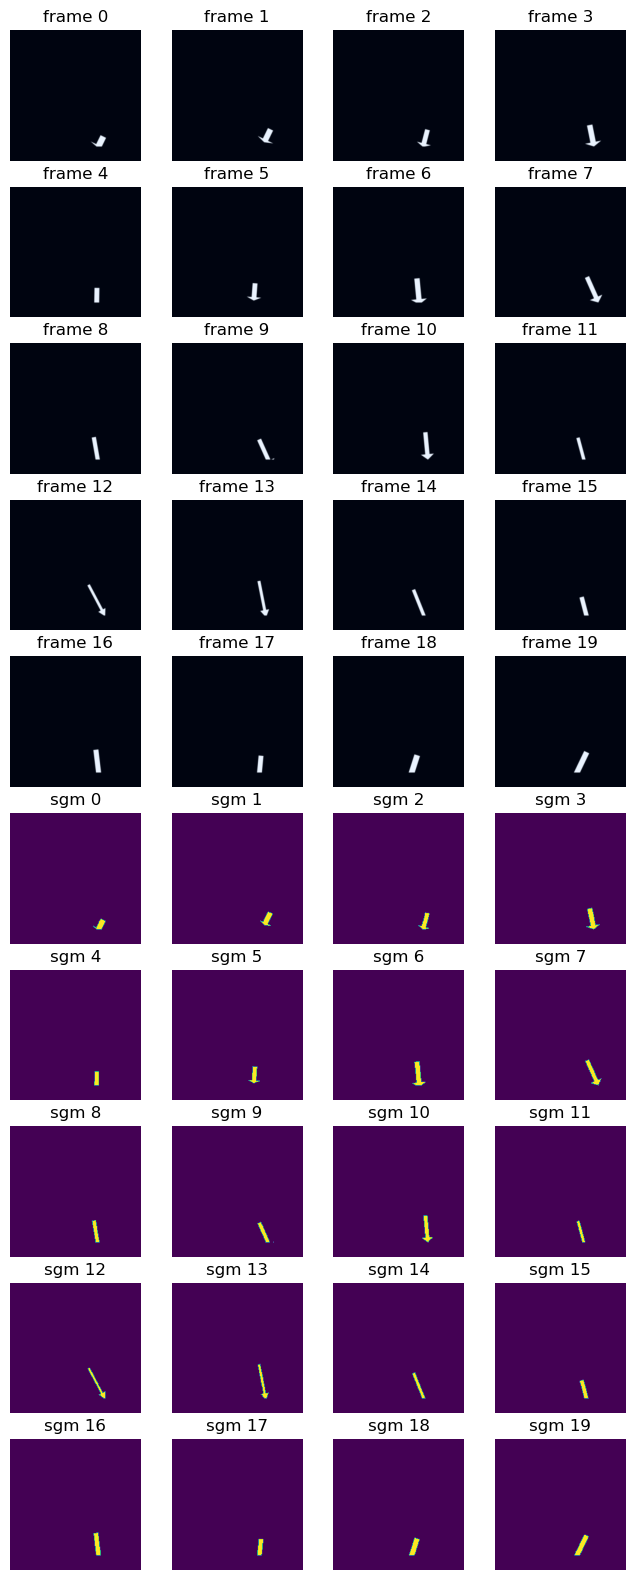

In [6]:
# show video
video_idx = 9
plt.style.use("default")
fig = plt.figure(figsize=(8, 20))
fig.set_facecolor("white")
for idx, data in enumerate(one_hundred_rawset.data_set[video_idx]):
    frame = data[0]
    bou = data[1]
    plt.subplot(10, 4, idx + 1)
    plt.imshow(normalize(frame.permute(1, 2, 0)))
    plt.axis("off")
    plt.title(f"frame {idx}", color="black")
for idx, data in enumerate(one_hundred_rawset.data_set[video_idx]):
    sgm = data[2]
    bou = data[1]
    plt.subplot(10, 4, idx + 1 + 20)
    plt.imshow(sgm)
    plt.axis("off")
    plt.title(f"sgm {idx}", color="black")


In [7]:
dataset = TenDataset(one_hundred_rawset)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [5]:
dataset.reset()

In [8]:
# show data
(
    video_idx,
    frame_idx,
    fir_img,
    fir_bou,
    fir_sgm,
    pre_img,
    pre_bou,
    pre_sgm,
    cur_img,
    cur_bou,
    cur_sgm,
) = next(iter(dataloader))
fir_img.shape, fir_bou.shape

(torch.Size([1, 3, 224, 224]), torch.Size([1, 80, 2]))

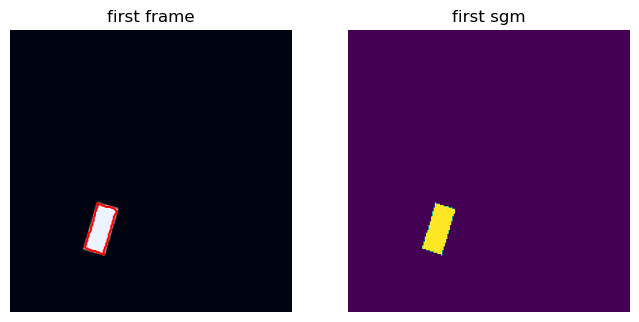

In [9]:
# show first frame
plt.figure(figsize=(8, 20))
plt.subplot(1, 2, 1)
plt.imshow(normalize(fir_img[0].permute(1, 2, 0)))
plt.plot(fir_bou[0][:, 0], fir_bou[0][:, 1], "r")
plt.axis("off")
plt.title("first frame")
plt.subplot(1, 2, 2)
plt.imshow(fir_sgm[0])
plt.axis("off")
plt.title("first sgm")
plt.show()

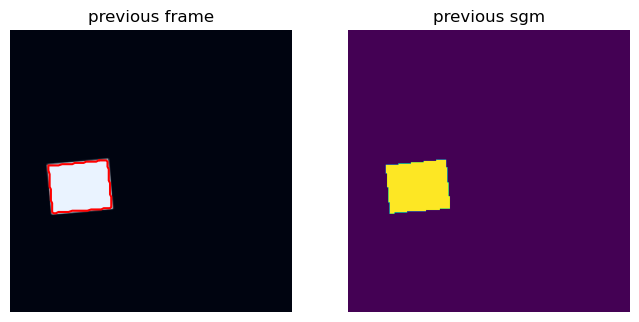

In [10]:
# show previous frame
plt.figure(figsize=(8, 20))
plt.subplot(1, 2, 1)
plt.imshow(normalize(pre_img[0].permute(1, 2, 0)))
plt.plot(pre_bou[0][:, 0], pre_bou[0][:, 1], "r")
plt.axis("off")
plt.title("previous frame")
plt.subplot(1, 2, 2)
plt.imshow(pre_sgm[0])
plt.axis("off")
plt.title("previous sgm")
plt.show()

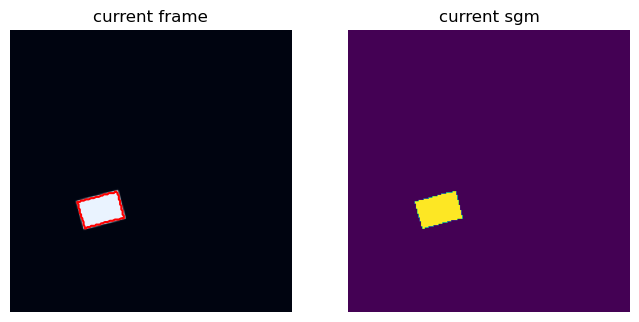

In [11]:
# show current frame
plt.figure(figsize=(8, 20))
plt.subplot(1, 2, 1)
plt.imshow(normalize(cur_img[0].permute(1, 2, 0)))
plt.plot(cur_bou[0][:, 0], cur_bou[0][:, 1], "r")
plt.axis("off")
plt.title("current frame")
plt.subplot(1, 2, 2)
plt.imshow(cur_sgm[0])
plt.axis("off")
plt.title("current sgm")
plt.show()

In [12]:
from tenLoader import TenVideoInfer
from DETR_model import DinoDETR

In [13]:
ten_video_infer = TenVideoInfer(one_hundred_rawset, True)
model = DinoDETR()
ten_video_infer.infer_model(model, 0)

Using cache found in /zhome/32/f/202284/.cache/torch/hub/mhamilton723_FeatUp_main
Using cache found in /zhome/32/f/202284/.cache/torch/hub/facebookresearch_dino_main
/work3/s232248/miniconda3/envs/ras/lib/python3.12/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [14]:
ten_video_infer.get_total_iou()

tensor(0.1319)